In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

2025-02-06 11:45:15.755271: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")
print("Current Working Directory:",os.getcwd())

Current Working Directory: /Users/SaqibAmin/Desktop/exe


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [7]:
lables= training_set.class_names
print(lables)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [8]:
validation_set =tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [30]:
cnn = tf.keras.models.Sequential()

In [31]:


cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [32]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [33]:

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [36]:

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [37]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.3556 - loss: 1.5204 - val_accuracy: 0.4200 - val_loss: 1.0216
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.5272 - loss: 0.9384 - val_accuracy: 0.7333 - val_loss: 0.5874
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7051 - loss: 0.6212 - val_accuracy: 0.7233 - val_loss: 0.5131
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.7762 - loss: 0.4690 - val_accuracy: 0.8033 - val_loss: 0.4261
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.8801 - loss: 0.2831 - val_accuracy: 0.8533 - val_loss: 0.3462
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8813 - loss: 0.2892 - val_accuracy: 0.8900 - val_loss: 0.2958
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9155 - loss: 0.2093 - val_accuracy: 0.9133 - val_loss: 0.1917
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9055 - loss: 0.2317 - val_accuracy: 0.9433 - val_loss

In [44]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 609ms/step - accuracy: 0.9919 - loss: 0.0331
Training accuracy: 0.9933333396911621


In [45]:
train_loss, train_acc = cnn.evaluate(validation_set)
print('validation  accuracy:', train_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 606ms/step - accuracy: 0.9789 - loss: 0.0673
validation  accuracy: 0.9700000286102295


In [49]:
training_history.history

{'accuracy': [0.3733333349227905,
  0.5866666436195374,
  0.7022222280502319,
  0.8177777528762817,
  0.8822222352027893,
  0.902222216129303,
  0.9266666769981384,
  0.9155555367469788,
  0.9522222280502319,
  0.9777777791023254],
 'loss': [1.251549243927002,
  0.8557642698287964,
  0.6450548768043518,
  0.41070038080215454,
  0.2777174115180969,
  0.25914037227630615,
  0.18979516625404358,
  0.2091544270515442,
  0.1213051825761795,
  0.06726332008838654],
 'val_accuracy': [0.41999998688697815,
  0.7333333492279053,
  0.7233333587646484,
  0.8033333420753479,
  0.8533333539962769,
  0.8899999856948853,
  0.9133333563804626,
  0.9433333277702332,
  0.9566666483879089,
  0.9700000286102295],
 'val_loss': [1.0215572118759155,
  0.5873783230781555,
  0.5131380558013916,
  0.42607489228248596,
  0.34617727994918823,
  0.29583707451820374,
  0.19170986115932465,
  0.16947442293167114,
  0.10167186707258224,
  0.08360707014799118]}

In [46]:
cnn.save('trained_plant_disease_model.keras')

In [47]:
epoch=[i for i in range(1,11)]

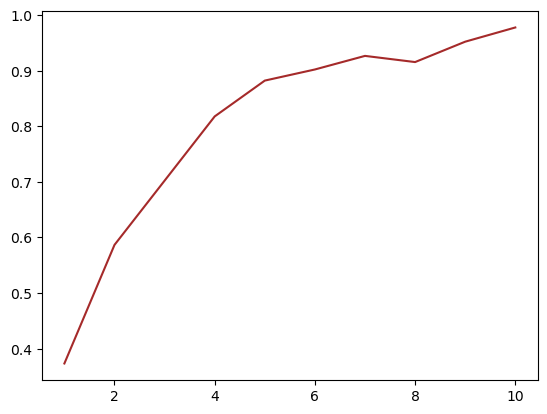

In [59]:
plt.plot(epoch,training_history.history['accuracy'],color='brown',label='Training Accuracy')

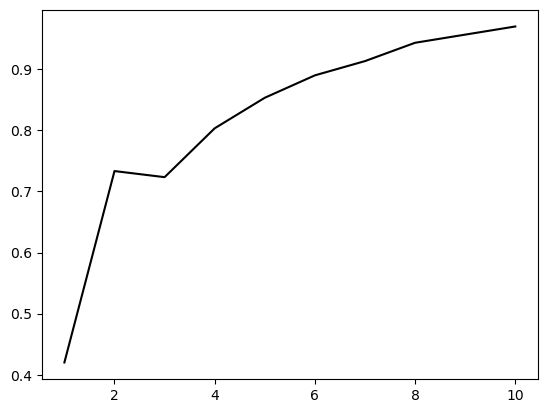

In [55]:
plt.plot(epoch,training_history.history['val_accuracy'],color='black',label='Validation Accuracy')